# Air Pollution Prediction (Use Case) - SENEM AKTAŞ

### Dataset Link: https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data

In [40]:
from IPython.display import Image
Image(url="quality.png", width = 500, height = 200)

# 1- Read And Examine Dataset CSV 

### Reading Dataset

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
#df = pd.read_csv("pollution.csv", parse_dates=True, index_col = "hour")

df= pd.read_csv("pollution.csv") # reading csv which include our dataset
print(df.shape)  #shape of the dataset - number of rows and columns

df.rename(columns={'pm2.5':'pollution'},inplace=True) #changed the name of pm2.5 -> pollution

df #reading dataset and print to screen

(43824, 13)


,No,year,month,day,hour,pollution,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


### Plot the "pollution: pollution concentration (pollution)" column. We need to look them and predict future air pollution. 

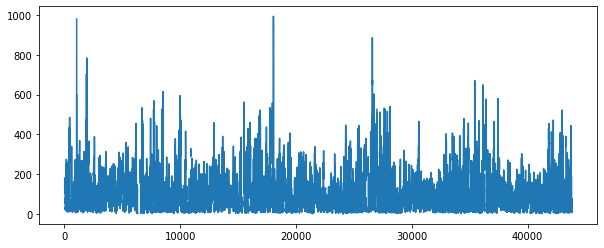

In [273]:
df['pollution'].plot(figsize=(10,4))

### Plot all the other columns as well in a plot to examine the curves of all of them at the same time.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda78e99a90>,
      dtype=object)

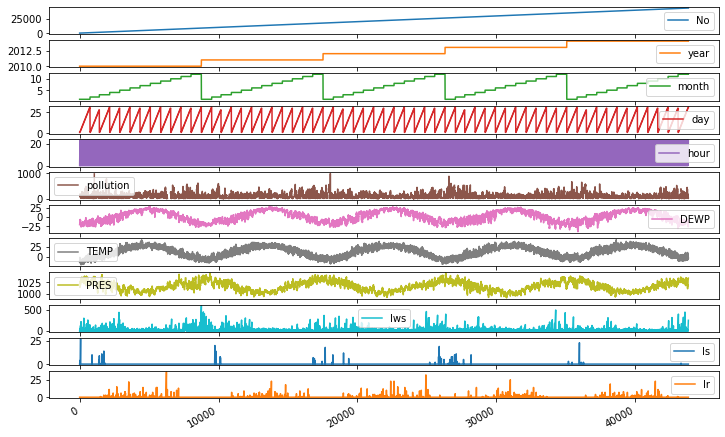

In [2]:
df.plot(subplots=True, figsize=(12,8))

# 2- Preprocessing Dataset

### Convert  dates into a standard format - timestamp
- We can see that the dataset looks like time series data as it has day hour month and year. So, we convert these columns into a timestamp.

In [104]:
import datetime

df['hour'] = df['hour'].replace(24,0)
df['DateTime'] = df[['year', 'month', 'day', 'hour']].apply(lambda s : datetime.datetime(*s),axis = 1)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'] = df.DateTime.values.astype(np.int64) // 10 ** 9 

df

,No,year,month,day,hour,pollution,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DateTime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,1262304000
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,1262307600
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,1262311200
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,1262314800
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,1262318400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,1420052400
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,1420056000
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,1420059600
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,1420063200


### Remove the unwanted columns
- We maintain "DateTime" column in the previous block. Removing 'No' column, as it is not relevant.

In [105]:
try:
  df.drop('No',axis = 1,inplace= True)
  df.drop('year',axis = 1,inplace= True)
  df.drop('month',axis = 1,inplace= True)
  df.drop('day',axis = 1,inplace= True)
  df.drop('hour',axis = 1,inplace= True)
  print(df.shape)
except:
  print(df.shape)
  #print("Already Done")

df = df.sort_values(by='DateTime',ascending=True)

# df = df.set_index('DateTime') # define DateTime columns as a index

df.head(3)

(43824, 9)


,pollution,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DateTime
0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,1262304000
1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,1262307600
2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,1262311200


### Calculation Null Values and Filling Them with Mean Values
- As a result, we could see there are 2067 NA values for pollution column. This column is our target column. Because of its importance we can not remove easily Null values.

In [106]:
print("Null values:\n\n",df.isnull().sum())
#Remvoing Null values
#df = df.dropna()
#print("\nNull values:\n\n",df.isnull().sum())
df.shape

Null values:

 pollution    2067
DEWP            0
TEMP            0
PRES            0
cbwd            0
Iws             0
Is              0
Ir              0
DateTime        0
dtype: int64


(43824, 9)

In [107]:
df_new=df
df_new = df_new.assign(pollution=df_new.pollution.fillna(df_new.pollution.mean()))
df_new

,pollution,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DateTime
0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0,1262304000
1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0,1262307600
2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0,1262311200
3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0,1262314800
4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0,1262318400
...,...,...,...,...,...,...,...,...,...
43819,8.000000,-23,-2.0,1034.0,NW,231.97,0,0,1420052400
43820,10.000000,-22,-3.0,1034.0,NW,237.78,0,0,1420056000
43821,10.000000,-22,-3.0,1034.0,NW,242.70,0,0,1420059600
43822,8.000000,-22,-4.0,1034.0,NW,246.72,0,0,1420063200


### Finding and Removing Outliers
- The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data. Often machine learning modeling, and model skill in general, can be improved by understanding or even removing these outliers. 
- In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. If there is an outlier it will plotted as point in the boxplot but other population will be grouped together and display as boxes. 

In [108]:
print("Shape of dataframe before removing outliers",df_new.shape)

Q1=df_new['pollution'].quantile(0.25)
Q3=df_new['pollution'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

df_new = df_new[df_new['pollution'] < Upper_Whisker]

print("\nShape of dataframe after removing outliers",df_new.shape)

Shape of dataframe before removing outliers (43824, 9)

Shape of dataframe after removing outliers (41707, 9)


### Checking correlations between the independent variables
- It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.

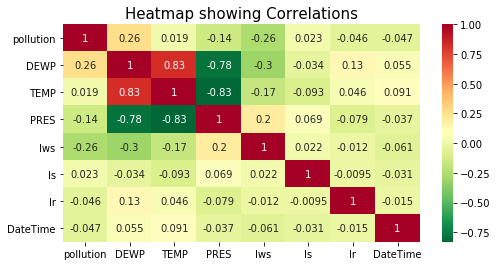

,pollution,DEWP,TEMP,PRES,Iws,Is,Ir,DateTime
pollution,1.000000,0.264816,0.019230,-0.138644,-0.256369,0.022872,-0.046406,-0.047136
DEWP,0.264816,1.000000,0.827722,-0.782181,-0.303421,-0.033901,0.125221,0.054822
TEMP,0.019230,0.827722,1.000000,-0.830913,-0.172675,-0.093064,0.045779,0.090853
PRES,-0.138644,-0.782181,-0.830913,1.000000,0.196201,0.068636,-0.078797,-0.036756
Iws,-0.256369,-0.303421,-0.172675,0.196201,1.000000,0.022398,-0.012442,-0.061109
Is,0.022872,-0.033901,-0.093064,0.068636,0.022398,1.000000,-0.009516,-0.031405
Ir,-0.046406,0.125221,0.045779,-0.078797,-0.012442,-0.009516,1.000000,-0.015034
DateTime,-0.047136,0.054822,0.090853,-0.036756,-0.061109,-0.031405,-0.015034,1.000000


In [109]:
plt.figure(figsize=(8,4))
sns.heatmap(df_new.corr(), cmap='RdYlGn_r',annot=True)
plt.title('Heatmap showing Correlations',size=15)
plt.show()

df_new.corr()

- TEMP is highly correlated with PRES and DEWP as the correlation coefficient is more than 0.8. So removing TEMP. Also removing PRES since it is also highly correlated with DEWP. 

/home/sidney/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


   pollution  DEWP cbwd    Iws  Is  Ir    DateTime
0  98.613215   -21   NW   1.79   0   0  1262304000
1  98.613215   -21   NW   4.92   0   0  1262307600
2  98.613215   -21   NW   6.71   0   0  1262311200
3  98.613215   -21   NW   9.84   0   0  1262314800
4  98.613215   -20   NW  12.97   0   0  1262318400


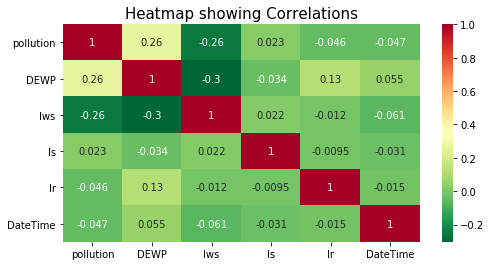

In [110]:
try:
  df_new.drop(['TEMP','PRES'],axis = 1,inplace= True)
except:
  print('Already Dropped')
print(df_new.head())

plt.figure(figsize=(8,4))
sns.heatmap(df_new.corr(), cmap='RdYlGn_r',annot=True)
plt.title('Heatmap showing Correlations',size=15)
plt.show() 

### Split Dataset into training and test data 
- To generate it sequentially as time is important, we kept 'Shuffle=False'

In [138]:
from sklearn.model_selection import train_test_split

# input columns
X=df_new[['DateTime', 'DEWP','Iws','Is','Ir']]

# X = df.drop(['pm2.5'], axis=1) or use this easily
# Column to predict-output
y=df_new['pollution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,shuffle= False)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((33365, 5), (33365,), (8342, 5), (8342,))

# 3- Machine Learninig Model

### Feature scaling
- The ColumnTransformer is a class in the scikit-learn Python machine learning library that allows you to selectively apply data preparation transforms. Using the ColumnTransformer to selectively apply data transforms to columns in a dataset with mixed data types.
- Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.  To standardizing the numerical features we use MinMaxScaler. Which is used which transforms the data in the range between 0 and 1.

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

num_attr = ["DEWP","Is","Ir","Iws"]


full_pipeline = ColumnTransformer([
 ("num", MinMaxScaler(), num_attr),
 ])

# Sequences of different transforms can also be chained together using the Pipeline, such as 
# imputing missing values, then scaling numerical values.
X_train_tr = full_pipeline.fit_transform(X_train)
X_test_tr = full_pipeline.transform(X_test)

print(X_train_tr.shape)
print(X_test_tr.shape)

(33365, 4)
(8342, 4)


## A- SGD Regression

- SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).
- Stochastic Gradient Descent (SGD) regressor implements a plain SGD learning routine supporting various loss functions and penalties to fit linear regression models.

In [113]:
#Building a stochastic gradient descent regressor and training the model
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train_tr, y_train)
y_pred_train = sgd.predict(X_train_tr)

In [114]:
#Predicting using model and evaluating model using RMSE, MAE and R-squared
# Unlike MAE, RMSE is more punishing of forecast errors.

from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_test = sgd.predict(X_test_tr)

Mse_train = mean_squared_error(y_train, y_pred_train)
Rmse_train = np.sqrt(Mse_train)
print("Root Mean Square Error for training set is ",Rmse_train)

Mse_test = mean_squared_error(y_test, y_pred_test)
Rmse_test = np.sqrt(Mse_test)
print("\nRoot Mean Square Error for test set is ",Rmse_test)

Mae_train = mean_absolute_error(y_train, y_pred_train)
Mae_test = mean_absolute_error(y_test, y_pred_test)
print("\nMean Absolute Error for training set is ",Mae_train)
print("\nMean Absolute Error for test set is ",Mae_test)

r_squared_train = sgd.score(X_train_tr, y_train)
r_squared_test = sgd.score(X_test_tr, y_test)
print("\nR-squared for training set is ",r_squared_train)
print("\nR-squared for test set is ",r_squared_test)

Root Mean Square Error for training set is  61.4519916955696

Root Mean Square Error for test set is  62.78536330150622

Mean Absolute Error for training set is  48.40794713999097

Mean Absolute Error for test set is  50.61857158498955

R-squared for training set is  0.12479636174732467

R-squared for test set is  0.037114832446998314


### RandomizedSearch
- searches for the specific subset of data in a random manner, instead of searching continuously (like how GridSearch does). This reduces the processing time of the hyperparameters. The scikit-learn module has RandomizedSearchCV function that can be used to implement random search. The hyperparameters are defined before searching them. 
- The evaluation metrics used to evaluate the model are Root Mean Square Error, Mean Absolute Error and R-squared. I am using these metrics because these are suitable to be used for regression models. R-Square measures how much of variability in dependent variable is being explained by the model. RMSE and MAE are different ways to measure the error of a model. 

In [115]:
#Hyper-parameters tuning in SGD using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

print("The Different hyperparameters in SGDRegressor along with their current values are:\n\n",sgd.get_params())

parameters = {'average': [True, False],
              'alpha':[0.0001, 0.001, 0.01, 0.1,],
              'loss': ['squared_loss','huber'],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'penalty':['l1', 'l2', 'elasticnet'],
              'eta0':[0.001,0.01,0.1]
             }

search = RandomizedSearchCV(estimator=sgd, param_distributions = parameters, cv = 3, n_iter = 10, n_jobs=-1)

result = search.fit(X_train_tr, y_train)

# summarize result
print(" \nResults from Randomized Search:\n" )
print('Best Score: %s' % result.best_score_)
print('\nBest Hyperparameters: %s' % result.best_params_)

The Different hyperparameters in SGDRegressor along with their current values are:

 {'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
 
Results from Randomized Search:

Best Score: 0.11358459485339138

Best Hyperparameters: {'penalty': 'l2', 'loss': 'squared_loss', 'learning_rate': 'adaptive', 'eta0': 0.1, 'average': False, 'alpha': 0.001}


- Above mentioned are the different hyper-parameters in SGDRegressor which can be changed to fine tune the model. Out of all these parameters We are tuning the parameters average, alpha, loss, learning_rate, penalty, eta0 and max_iterations. 
- We have used RandomizedSearchCV to find out the best parameter values as suited for the model. The best hyperparameters value returned by RandomizedSearchCV are mentioned in the output above.  We have run the model specifying these best hyper-parameter values in the below block of code.

In [135]:
sgd = SGDRegressor(random_state=42, alpha= 0.001, average=False, learning_rate= 'invscaling',
                   max_iter=5000, eta0=0.001, loss= 'squared_loss',penalty= 'l1')
sgd.fit(X_train_tr, y_train)
y_pred_train = sgd.predict(X_train_tr)
y_pred = sgd.predict(X_test_tr)

Mse_train = mean_squared_error(y_train, y_pred_train)
Rmse_train = np.sqrt(Mse_train)
print("Root Mean Square Error for training set is ",Rmse_train)

Mse_test = mean_squared_error(y_test, y_pred)
Rmse_test = np.sqrt(Mse_test)
print("\nRoot Mean Square Error for test set is ",Rmse_test)

Mae_train = mean_absolute_error(y_train, y_pred_train)
Mae_test = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error for training set is ",Mae_train)
print("\nMean Absolute Error for test set is ",Mae_test)

r_squared_train = sgd.score(X_train_tr, y_train)
r_squared_test = sgd.score(X_test_tr, y_test)
print("\nR-squared for training set is ",r_squared_train)
print("\nR-squared for test set is ",r_squared_test)

Root Mean Square Error for training set is  61.462007389694

Root Mean Square Error for test set is  89.64354760555439

Mean Absolute Error for training set is  48.31128930256208

Mean Absolute Error for test set is  87.27265117262898

R-squared for training set is  0.12451105004184872

R-squared for test set is  -154990.67933381512


### Normalise the value between 0 and 1. Then  ploting the graph

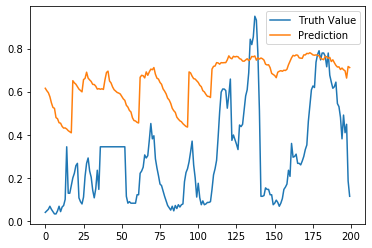

In [137]:
y_test= (y_test-min(y_test))/(max(y_test)-min(y_test))
y_pred=  (y_pred-min(y_pred))/(max(y_pred)-min(y_pred))

plt.plot(np.array(y_test[:200]),label='Truth Value')
plt.plot(np.array(y_pred[:200]),label='Prediction')
plt.legend()
plt.show()

## B- XGBoost Regression

- XGBoost is a powerful machine learning algorithm especially where speed and accuracy are concerned
- It is a powerful approach for building supervised regression models . The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners.
- We need to consider different parameters and their values to be specified while implementing an XGBoost model
- The XGBoost model requires parameter tuning to improve and fully leverage its advantages over other algorithms

In [139]:
#Building a xgboost regressor and training the model
# check xgboost version
import xgboost
print(xgboost.__version__)

from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# create an xgboost regression model
xbr = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

"""# fit model
xbr.fit(X_train_tr, y_train)

# make a prediction
y_pred_train = xbr.predict(X_train_tr)

# summarize prediction
y_pred_train"""

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xbr, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

1.4.1
Mean MAE: 16.617 (0.218)


In [140]:
#Hyper-parameters tuning in XGBRegressor using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

print("The Different hyperparameters in XGBRegressor along with their current values are:\n\n",xbr.get_params())

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

parameters = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}


search = RandomizedSearchCV(estimator=xbr, param_distributions = parameters, cv = 3, n_iter = 10, n_jobs=-1)

result = search.fit(X_train_tr, y_train)

# summarize result
print(" \nResults from Randomized Search:\n" )
print('Best Score: %s' % result.best_score_)
print('\nBest Hyperparameters: %s' % result.best_params_)


The Different hyperparameters in XGBRegressor along with their current values are:

 {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'gamma': None, 'gpu_id': None, 'importance_type': 'gain', 'interaction_constraints': None, 'learning_rate': None, 'max_delta_step': None, 'max_depth': 7, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 1000, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': 0.7, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'eta': 0.1}
 
Results from Randomized Search:

Best Score: 0.19230293867703485

Best Hyperparameters: {'colsample_bytree': 0.9825377177642116, 'gamma': 7.1275993852648964, 'learning_rate': 0.4335292452695875, 'max_depth': 3, 'min_child_weight': 194.79172089224562, 'n_estimators': 28, 'reg_alpha': 64.

In [61]:
# create an xgboost regression model
xbr = XGBRegressor(n_estimators=22, max_depth=29, eta=0.1, subsample=0.7, colsample_bytree=0.8)

xbr.fit(X_train_tr, y_train)
y_pred_train = xbr.predict(X_train_tr)
y_pred = xbr.predict(X_test_tr)

Mse_train = mean_squared_error(y_train, y_pred_train)
Rmse_train = np.sqrt(Mse_train)
print("Root Mean Square Error for training set is ",Rmse_train)

Mse_test = mean_squared_error(y_test, y_pred)
Rmse_test = np.sqrt(Mse_test)
print("\nRoot Mean Square Error for test set is ",Rmse_test)

Mae_train = mean_absolute_error(y_train, y_pred_train)
Mae_test = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error for training set is ",Mae_train)
print("\nMean Absolute Error for test set is ",Mae_test)

r_squared_train = xbr.score(X_train_tr, y_train)
r_squared_test = xbr.score(X_test_tr, y_test)
print("\nR-squared for training set is ",r_squared_train)
print("\nR-squared for test set is ",r_squared_test)

Root Mean Square Error for training set is  53.33518901033372

Root Mean Square Error for test set is  59.54816653438189

Mean Absolute Error for training set is  38.79384517060758

Mean Absolute Error for test set is  45.86504908331769

R-squared for training set is  0.34072764509702813

R-squared for test set is  0.13384730276191026


/home/sidney/anaconda3/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/home/sidney/anaconda3/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/home/sidney/anaconda3/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


### Normalise the value between 0 and 1. Then  ploting the graph

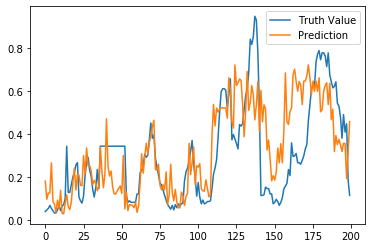

In [62]:
y_test= (y_test-min(y_test))/(max(y_test)-min(y_test))
y_pred=  (y_pred-min(y_pred))/(max(y_pred)-min(y_pred))

plt.plot(np.array(y_test[:200]),label='Truth Value')
plt.plot(np.array(y_pred[:200]),label='Prediction')
plt.legend()
plt.show()

# 4- Deep Learning Model

### Feature scaling
- This is done to transform raw data into a standardized dataset so that so that they fall in a specific range of values. MinMaxScaler is used which transforms the data in the range between 0 and 1.

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


Feature Variance:

[0.55724294 0.37889551 0.0468239  0.01158177 0.00545588]

Cumulative Feature Variance:

[0.55724294 0.93613845 0.98296235 0.99454412 1.        ]


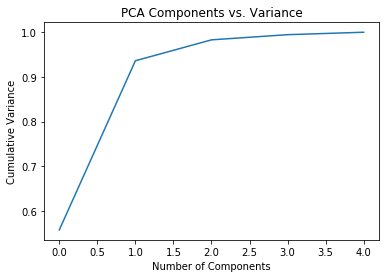

In [64]:
from sklearn.decomposition import PCA

# Finding optimal number of components for dimensionality reduction
pca = PCA(n_components=None)
pca.fit(X_train_scaled)
feature_variance = pca.explained_variance_ratio_
total_variance = np.cumsum(feature_variance)  # cumulative sum

print('\nFeature Variance:\n')
print(feature_variance)
print('\nCumulative Feature Variance:\n')
print(total_variance)

plt.plot(total_variance)
plt.title('PCA Components vs. Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [65]:
# Selecting 6 Components
pca_X = PCA(n_components=4)
X_train_pca = pca_X.fit_transform(X_train_scaled)
X_test_pca = pca_X.transform(X_test_scaled)

In [66]:
pca_columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
X_train_pca = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca = pd.DataFrame(X_test_pca, columns=pca_columns)

In [67]:
X_train_lstm = np.array(X_train_pca) #X_train_scaled
X_train_lstm = X_train_lstm[:, :, None]
print(X_train_lstm.shape)
X_test_lstm = np.array(X_test_pca)#X_test_scaled
X_test_lstm = X_test_lstm[:, :, None]
print(X_test_lstm.shape)

(33365, 4, 1)
(8342, 4, 1)


In [68]:
#!pip install keras-tuner

import pickle
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout

import kerastuner
from kerastuner.tuners.bayesian import BayesianOptimization
from kerastuner.tuners.randomsearch import RandomSearch

from sklearn.model_selection import RandomizedSearchCV

In [69]:
# vanilla lstm model
def lstm_model():
    model = keras.Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
    model.add(Dropout(0.4))
    model.add(LSTM(units=16))
    model.add(Dropout(0.4))
    model.add(Dense(units=8))
    model.add(Dropout(0.4))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss = 'mse',metrics=['mae', 'mse'])
    return model

In [70]:
from keras.wrappers.scikit_learn import KerasRegressor

regressor = KerasRegressor(build_fn=lstm_model, batch_size=64, epochs=30)

In [71]:
results=regressor.fit(X_train_lstm, y_train)

Epoch 1/30
522/522 [==============================] - 2s 4ms/step - loss: 7261.3447 - mae: 63.4105 - mse: 7261.3447
Epoch 2/30
522/522 [==============================] - 2s 4ms/step - loss: 5130.7720 - mae: 56.0137 - mse: 5130.7720
Epoch 3/30
522/522 [==============================] - 2s 4ms/step - loss: 4834.3042 - mae: 53.2751 - mse: 4834.3042
Epoch 4/30
522/522 [==============================] - 2s 4ms/step - loss: 4597.6973 - mae: 51.3085 - mse: 4597.6973
Epoch 5/30
522/522 [==============================] - 2s 4ms/step - loss: 4553.6387 - mae: 50.8799 - mse: 4553.6387
Epoch 6/30
522/522 [==============================] - 2s 4ms/step - loss: 4511.4146 - mae: 50.6882 - mse: 4511.4146
Epoch 7/30
522/522 [==============================] - 2s 4ms/step - loss: 4492.7881 - mae: 50.4971 - mse: 4492.7881
Epoch 8/30
522/522 [==============================] - 2s 4ms/step - loss: 4457.0776 - mae: 50.2220 - mse: 4457.0776
Epoch 9/30
522/522 [==============================] - 2s 4ms/step - loss

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_report(y_true, y_pred):
    print("mean_squared_error: {}".format(mean_squared_error(y_true, y_pred)))  # should be close to 0
    print("mean_absolute_error: {}".format(mean_absolute_error(y_true, y_pred)))  # should be close to 0
    print("r2_score: {}".format(r2_score(y_true, y_pred)))  # should be close to 1

In [73]:
y_pred = regressor.predict(X_test_lstm)
regression_report(y_test, y_pred)

mean_squared_error: 6267.533062535494
mean_absolute_error: 75.73398184392754
r2_score: -120882.47806532953


### Normalise the value between 0 and 1. Then  ploting the graph

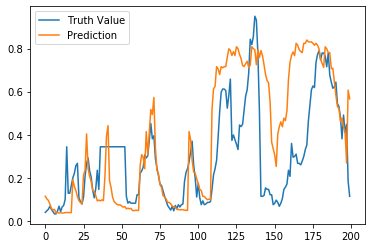

In [74]:
y_test= (y_test-min(y_test))/(max(y_test)-min(y_test))
y_pred=  (y_pred-min(y_pred))/(max(y_pred)-min(y_pred))

plt.plot(np.array(y_test[:200]),label='Truth Value')
plt.plot(np.array(y_pred[:200]),label='Prediction')
plt.legend()
plt.show()

- As we can see, the deep learning technique needs more data to work well, So we can try to fine tune the data what we have already.
- Bayesian Optimization provides a principled technique based on Bayes Theorem to direct a search of a global optimization problem that is efficient and effective.
- Hyperparameter tuning is a good fit for Bayesian Optimization because the evaluation function is computationally expensive (e.g. training models for each set of hyperparameters) and noisy (e.g. noise in training data and stochastic learning algorithms). 

In [75]:
# tune optimizer
def tune_model_nn(hp):
    model = keras.Sequential()
    model.add(LSTM(units=hp.Int('units_start', min_value=8, max_value=128, step=16), 
                   return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
    model.add(Dropout(rate=hp.Choice('drop_rate_start', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])))

    for i in range(hp.Int('num_layers', 1, 6)):
        model.add(LSTM(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=16), return_sequences=True))
        model.add(Dropout(rate=hp.Choice('drop_rate_' + str(i), [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])))

    model.add(LSTM(units=hp.Int('units_end',min_value=8,max_value=128,step=16)))
    model.add(Dropout(rate=hp.Choice('drop_rate_end', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])))
    model.add(Dense(units=1))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                  loss = 'mean_squared_error', metrics=['mae', 'mse'])
    return model

In [81]:
!rm -rf exec_data  # delete the previous execution data

MAX_TRIALS = 8    # TODO: 40
EXECUTIONS_PER_TRIAL = 3     # TODO: 3 or 5
TRAIN_EPOCHS = 32

tuner = BayesianOptimization(
    tune_model_nn,
    objective=kerastuner.Objective('loss', 'min'),
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTIONS_PER_TRIAL,
    directory='exec_data',
    project_name='lstm_nn'
)
print(tuner.search_space_summary())
tuner.search(x=X_train_lstm, y=y_train, epochs=TRAIN_EPOCHS, 
             validation_data=(X_test_lstm, y_test))
print(tuner.results_summary())

Trial 8 Complete [00h 13m 56s]
loss: 2451.8072102864585

Best loss So Far: 2451.8072102864585
Total elapsed time: 02h 16m 39s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in exec_data/lstm_nn
Showing 10 best trials
Objective(name='loss', direction='min')
Trial summary
Hyperparameters:
units_start: 88
drop_rate_start: 0.2
num_layers: 1
units_0: 88
drop_rate_0: 0.0
units_end: 56
drop_rate_end: 0.3
learning_rate: 0.01
units_1: 72
drop_rate_1: 0.4
units_2: 104
drop_rate_2: 0.3
units_3: 56
drop_rate_3: 0.2
units_4: 88
drop_rate_4: 0.1
Score: 2451.8072102864585
Trial summary
Hyperparameters:
units_start: 40
drop_rate_start: 0.3
num_layers: 3
units_0: 104
drop_rate_0: 0.1
units_end: 72
drop_rate_end: 0.2
learning_rate: 0.001
units_1: 104
drop_rate_1: 0.3
units_2: 56
drop_rate_2: 0.0
units_3: 56
drop_rate_3: 0.5
units_4: 104
drop_rate_4: 0.3
Score: 3009.0823567708335
Trial summary
Hyperparameters:
units_start: 40
drop_rate_start: 0.3
num_layers: 3
units_0: 104
drop_rate_0: 0.1

In [82]:
# Get best model
print(tuner.results_summary())

Results summary
Results in exec_data/lstm_nn
Showing 10 best trials
Objective(name='loss', direction='min')
Trial summary
Hyperparameters:
units_start: 88
drop_rate_start: 0.2
num_layers: 1
units_0: 88
drop_rate_0: 0.0
units_end: 56
drop_rate_end: 0.3
learning_rate: 0.01
units_1: 72
drop_rate_1: 0.4
units_2: 104
drop_rate_2: 0.3
units_3: 56
drop_rate_3: 0.2
units_4: 88
drop_rate_4: 0.1
Score: 2451.8072102864585
Trial summary
Hyperparameters:
units_start: 40
drop_rate_start: 0.3
num_layers: 3
units_0: 104
drop_rate_0: 0.1
units_end: 72
drop_rate_end: 0.2
learning_rate: 0.001
units_1: 104
drop_rate_1: 0.3
units_2: 56
drop_rate_2: 0.0
units_3: 56
drop_rate_3: 0.5
units_4: 104
drop_rate_4: 0.3
Score: 3009.0823567708335
Trial summary
Hyperparameters:
units_start: 40
drop_rate_start: 0.3
num_layers: 3
units_0: 104
drop_rate_0: 0.1
units_end: 72
drop_rate_end: 0.2
learning_rate: 0.001
units_1: 104
drop_rate_1: 0.3
units_2: 56
drop_rate_2: 0.0
units_3: 56
drop_rate_3: 0.5
units_4: 104
drop_rat

In [95]:
print('Bayesion Optimization Hyperparameters:')
tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

Bayesion Optimization Hyperparameters:


{'units_start': 88,
 'drop_rate_start': 0.2,
 'num_layers': 1,
 'units_0': 88,
 'drop_rate_0': 0.0,
 'units_end': 56,
 'drop_rate_end': 0.3,
 'learning_rate': 0.01,
 'units_1': 72,
 'drop_rate_1': 0.4,
 'units_2': 104,
 'drop_rate_2': 0.3,
 'units_3': 56,
 'drop_rate_3': 0.2,
 'units_4': 88,
 'drop_rate_4': 0.1}

In [99]:
bo_best_model = tuner.get_best_models()[0]
bo_best_model.fit(X_train_lstm, y_train)

print('Bayesion Optimization Results:')
y_pred = bo_best_model.predict(X_test_lstm)
regression_report(y_test, y_pred)

1043/1043 [==============================] - 8s 8ms/step - loss: 2420.2668 - mae: 37.1446 - mse: 2420.2668
Bayesion Optimization Results:
mean_squared_error: 22813.898149900288
mean_absolute_error: 146.8777267116004
r2_score: -440016.36074966507


### Normalise the value between 0 and 1. Then  ploting the graph

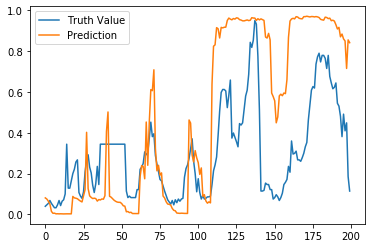

In [97]:
y_test= (y_test-min(y_test))/(max(y_test)-min(y_test))
y_pred=  (y_pred-min(y_pred))/(max(y_pred)-min(y_pred))

plt.plot(np.array(y_test[:200]),label='Truth Value')
plt.plot(np.array(y_pred[:200]),label='Prediction')
plt.legend()
plt.show()

# Conclusion 

- Large amounts of NA values can significantly affect the output of the model. First of all, different methods can be used to fill in Null values.For example, interpolation. Or, NA values can be filled with the averages of a certain number of previous and next values with the number of windows. 
-  A regression problem where input variables are ordered by time is called a time series forecasting problem. Regression is the task of predicting a continuous quantity and we can know how close the predictions were to the expected values. Therefore in here we used to regressors.
- We chosed XBoostRegressor and SGDRegressor ML, and LSTM for our Deep Leaning model. (Apart from the created models, many models can be used.)Each algorithm has their own advantages and disadvantages.
- When we examine the results of Deep Learning and Machine Learning, it is seen that Deep Learning is more successful (With the same amount of the same data.). 